In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
single_image = x_train[0]

In [7]:
single_image.shape

(28, 28)

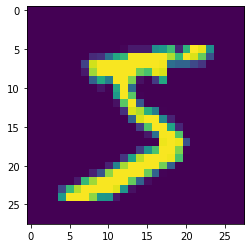

In [8]:
plt.imshow(single_image)

In [9]:
from tensorflow.keras.utils import to_categorical

In [10]:
y_train.shape

(60000,)

In [11]:
y_example = to_categorical(y_train)

In [12]:
y_example.shape


(60000, 10)

In [13]:
y_example[2]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [14]:
y_cat_test = to_categorical(y_test, 10)

In [16]:
y_cat_train = to_categorical(y_train, 10)

In [17]:
x_train = x_train/255
x_test = x_test/255

In [18]:
scaled_image = x_train[0]

In [19]:
scaled_image.max()

1.0

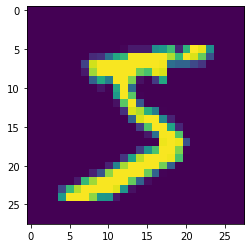

In [20]:
plt.imshow(scaled_image)

In [35]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [36]:
x_test = x_test.reshape(10000,28,28,1)

In [37]:
from tensorflow.keras.models import Sequential

In [38]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [39]:
model = Sequential()

In [40]:
model.add(Conv2D(filters = 32, kernel_size = (4,4), strides =(1,1), padding = 'valid', input_shape = (28,28,1), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Flatten())

model.add(Dense(128, activation = 'relu'))

model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',
              metrics=['accuracy'])

In [41]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=1)

In [42]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1414 - accuracy: 0.9577 - val_loss: 0.0610 - val_accuracy: 0.9803
Epoch 2/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0480 - accuracy: 0.9851 - val_loss: 0.0453 - val_accuracy: 0.9858
Epoch 3/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0314 - accuracy: 0.9904 - val_loss: 0.0417 - val_accuracy: 0.9859
Epoch 4/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0218 - accuracy: 0.9929 - val_loss: 0.0387 - val_accuracy: 0.9881
Epoch 5/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0158 - accuracy: 0.9951 - val_loss: 0.0475 - val_accuracy: 0.9862


In [43]:
metrics = pd.DataFrame(model.history.history)

<AxesSubplot:>

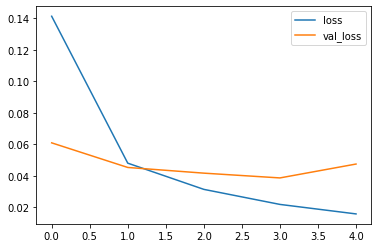

In [46]:
metrics[['loss', 'val_loss']].plot()


In [47]:
model.metrics_names

['loss', 'accuracy']

In [48]:
model.evaluate(x_test,y_cat_test, verbose = 0)

[0.04748963192105293, 0.9861999750137329]

In [49]:
from sklearn.metrics import classification_report, confusion_matrix

In [50]:
predictions = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [51]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [52]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       1.00      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.97      0.99      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.95      0.97      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [53]:
confusion_matrix(y_test, predictions)

array([[ 975,    1,    1,    0,    0,    0,    2,    1,    0,    0],
       [   0, 1132,    1,    1,    0,    0,    0,    0,    1,    0],
       [   0,    2, 1021,    1,    0,    0,    1,    6,    1,    0],
       [   1,    1,    1, 1001,    0,    1,    0,    2,    3,    0],
       [   0,    0,    0,    0,  975,    0,    1,    2,    1,    3],
       [   2,    0,    1,    9,    0,  872,    6,    0,    2,    0],
       [   4,    3,    0,    0,    1,    1,  947,    0,    2,    0],
       [   0,    1,    7,    0,    0,    0,    0, 1019,    1,    0],
       [   6,    2,    1,    2,    2,    0,    0,    0,  958,    3],
       [   1,    3,    1,    2,   18,    2,    0,   16,    4,  962]],
      dtype=int64)

<AxesSubplot:>

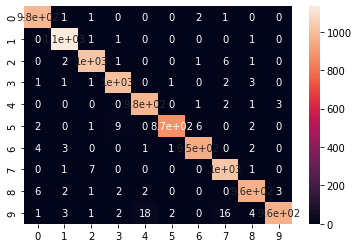

In [54]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, predictions), annot = True)